## Project: Wrangling and Analyzing Data on the twitter Account of WeRateDogs

## Data Gathering
In the cell below, I'll gather **all** three pieces of data for this project and load them in the jupyter notebook.   

In [1]:
# importing python packages for our data wrangling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os


%matplotlib inline

In [3]:
# reading the twitter-archive-enhanced csv file with pandas
dogs_archive = pd.read_csv(r'C:\Users\Ezinne\Desktop\UDACITY CODE BASE\project 2\twitter-archive-enhanced.csv')

In [4]:
#viewing the first five rows of the twitter-archive-enhanced dataset
dogs_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#viewing the last five rows of the twitter-archive-enhanced dataset
dogs_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
#viewing the structure of the twitter-archive-enhanced dataset
dogs_archive.shape

(2356, 17)

the dogs_archive dataframe contains 2356 rows and 17 columns

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
#creating a Folder for image_predictions using OS method
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
# Creating the Request, Defining the url and using the requests.get method to get our data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [8]:
#Accessing the Content and Writing to a File
#Using the Requests.content method and some basic file I/O to save this file to our computer.
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [11]:
# Importing the image_prediction TSV file into a DataFrame
dogs_image = pd.read_csv(r'C:\Users\Ezinne\Desktop\UDACITY CODE BASE\project 2\image_predictions\image-predictions.tsv', sep='\t')

In [12]:
#viewing the first five rows of the image_prediction dataset
dogs_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
#viewing the last five rows of the image_prediction dataset
dogs_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
#viewing the structure of the image_prediction dataset
dogs_image.shape

(2075, 12)

the dogs_image dataframe contains 2075 rows and 12 columns

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [13]:
#loading Twitter API into an empty list called tweets_list  
import json
tweets_list = []
with open('tweet-json.txt','r') as file:
    for line in file:
        twitter_api = json.loads(line)
        tweets_list.append(twitter_api)
twitter_api = pd.DataFrame(tweets_list,columns=['id','retweet_count','favorite_count'])  

In [14]:
#checking the head of the data
twitter_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [15]:
#checking the end of the data
twitter_api.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


In [16]:
#saving our files in csv format in order to view them properly
dogs_archive.to_csv('dogs_archive.csv', index = False)
dogs_image.to_csv('dogs_image.csv', index = False)
twitter_api.to_csv('twitter_api.csv', index = False)

### Accessing our datasets visually

In [17]:
#viewing the first dataset
dogs_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
#viewing the statistics of the first dataset
dogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#viewing the second dataset
dogs_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
#viewing the statistics of the second dataset
dogs_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
#viewing the third dataset
twitter_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [22]:
#viewing the statistics of the twitter_api dataset
twitter_api.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Accessing our datasets programmatically

In [23]:
#checking for missing info on the first dataset
dogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
#viewing the statistics of the first dataset
dogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
#checking the dataset randomly for errors
dogs_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
838,767500508068192258,NaN,NaN,2016-08-21 23:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's making quite a h*ckin mess...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767500508...,12,10,Louie,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
2030,671789708968640512,NaN,NaN,2015-12-01 20:35:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is space pup. He's very confused. Tries t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671789708...,13,10,space,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None


In [26]:
#checking for duplicates
dogs_archive.duplicated().sum()

0

there are no duplicate in our first dataset

In [27]:
#checking for missing info on the second dataset
dogs_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
#viewing the statistics of the second dataset
dogs_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
#checking the dataset randomly for errors
dogs_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False
1434,773670353721753600,https://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg,1,Old_English_sheepdog,0.969311,True,Maltese_dog,0.013243,True,soft-coated_wheaten_terrier,0.004857,True
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True


In [30]:
#checking for duplicates
dogs_image.duplicated().sum()

0

there are no duplicates in this dataset

In [31]:
#checking for missing info on the third dataset
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [32]:
#viewing the statistics of the second dataset
twitter_api.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [33]:
#checking the dataset randomly for errors
twitter_api.sample(5)

,id,retweet_count,favorite_count
1197,716791146589110272,1474,5204
2109,670442337873600512,213,690
2276,667435689202614272,89,326
1038,744223424764059648,424,1868
2101,670676092097810432,45,267


In [34]:
#checking for duplicates in the 
twitter_api.duplicated().sum()

0

there are no duplicates in this dataset

### Quality issues

1. The ID fields in the 3 datasets(dogs_archive,dogs_image and twitter_api) should be objects, not integers or floats

2. The timestamp column on the dogs_archive dataset is in object data type which is wrong.

3. There are missing values in the dogs_archive dataset for expanded_url.

4. Extracting the original tweets with dogs images.

5. Irrelevant columns such as retweeted and reply columns on dogs_archive dataset to be dropped.

6. Intend to query p2_dog = true in the analysis of the dogs_image dataset.

7. Some Rating values are not correctly extracted in dogs_archive dataset.

8. Dropping irrelevant columns in dogs_image datasets not needed in my analysis


### Tidiness issues
1. Merging the stages of Dogs into a single column

2. merging the three (3) datasets - dogs_archive, dogs_image and Twitter_api.

## Cleaning Data


In [419]:
# Making copies of original pieces of datasets
dogs_archive_clean = dogs_archive.copy()
dogs_image_clean = dogs_image.copy()
twitter_api_clean = twitter_api.copy()

### Issue #1: 
The ID fields in the 3 datasets(dogs_archive,dogs_image and twitter_api) should be objects, not integers or floats


#### Define: 
changing the DataTypes of 
* tweet_id in dogs_archive dataset from integer to object.

* tweet_id in dogs_image dataset from integer to object.

* id in twitter_api dataset from interger to object.

#### Code 

In [420]:
# changing the datatypes of the 3 datasets from integer to object
dogs_archive_clean['tweet_id'] = dogs_archive_clean['tweet_id'].astype(str)
dogs_image_clean['tweet_id'] = dogs_image_clean['tweet_id'].astype(str)
twitter_api_clean['id'] = twitter_api_clean['id'].astype(str)


#### Test

In [421]:
#first dataset dogs_archive
dogs_archive_clean['tweet_id'].dtypes

dtype('O')

In [422]:
#Second datasets dogs_image
dogs_image_clean['tweet_id'].dtypes

dtype('O')

In [423]:
#Third dataset twitter_api
twitter_api_clean['id'].dtypes

dtype('O')

### Issue #2:
The timestamp column on the dogs_archive dataset is in object data type which is wrong.

#### Define
Changing TimeStamp dtype from object to datetime

#### Code

In [424]:
#changing the timestamp to pandas datetime
dogs_archive_clean.timestamp = pd.to_datetime(dogs_archive_clean.timestamp)

#### Test

In [425]:
# checking for correction on the timestamp datatype
dogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3:
Missing values in the dogs_archive dataset for expanded_url.

#### Define:
Filling the expanded_url with zero (0)

#### Code:

In [426]:
# filling the expanded_weblink with (0)
dogs_archive_clean.expanded_urls = dogs_archive_clean.expanded_urls.fillna(0)

#### Test:

In [427]:
# checking if it is correctly filled
dogs_archive_clean.expanded_urls.isna().value_counts()

False    2356
Name: expanded_urls, dtype: int64

### Issue #4:
Extracting the original tweets with dogs images.

#### Define:
Extracting the original Tweets 

#### Code:

In [428]:
#checking for all not null data in retweeted_status_user_id
retweeted_text = dogs_archive_clean[dogs_archive_clean.retweeted_status_user_id.notnull()]

#viewing retweeted_text
retweeted_text

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [429]:
#checking the dropped retweeted text
retweeted_text.shape

(181, 17)

In [430]:
#dropping  retweeted_text column in the dogs_archive_clean dataset
dogs_archive_clean.drop(retweeted_text.index, axis = 0, inplace = True)

#### Test:

In [431]:
#checking if retweeted_status_user_id is still showing
dogs_archive_clean.retweeted_status_user_id.notnull().sum()

0

### Issue#5:
Irrelevant columns such as retweeted and reply columns on dogs_archive dataset to be dropped.

#### Define:
Dropping retweeted and reply columns

#### Code:

In [432]:
#dropping all retweeted and reply columns
dogs_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id',
                                    'retweeted_status_id','retweeted_status_user_id',
                                    'retweeted_status_timestamp'],inplace = True)

#### Test:

In [433]:
# checking to see that columns dropped
dogs_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue#6:
Intend to query p2_dog = true in the analysis of the dogs_image dataset.

#### Define:
 Query only p2_dog = true in the analysis of the dogs_image dataset

#### Code:

In [434]:
# querying the p2_dog
dogs_image_clean = dogs_image_clean.query('p2_dog == True')

#### Test:

In [435]:
# checking for p2_dog = true value count
dogs_image_clean.p2_dog.value_counts()

True    1553
Name: p2_dog, dtype: int64

In [436]:
# looking through our data for correctness
dogs_image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7:
Some Rating values are not correctly extracted in dogs_archive dataset

#### Define:
Extracting rating_numerator and rating_denominator

#### Code:

In [437]:
# extracting the rating values
ratings = dogs_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [438]:
dogs_archive_clean.rating_numerator = ratings

In [439]:
# checking for missing values in ratings
ratings.isnull().sum()

0    0
1    0
dtype: int64

In [440]:
ratings.head()

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [441]:
# picked the first column using indexing
dogs_archive_clean['dogs_ratings']=ratings[0]

#### Test:

In [442]:
# checking for correctness
dogs_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_ratings
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12


### Issue #8:
Dropping irrelevant columns in dogs_image datasets not needed in my analysis

#### Define:
Dropping columns not needed in dogs_image datasets for my analysis

#### Code:

In [443]:
# dropping p1','p1_conf','p1_dog','p3','p3_conf','p3_dog
dogs_image_clean.drop(columns = ['p1','p1_conf','p1_dog',
                                        'p3','p3_conf','p3_dog'] , inplace = True) 

#### Test:

In [444]:
# checking the columns to ensure the dropping was done
dogs_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog'], dtype='object')

In [445]:
# viewing our data
dogs_image_clean

,tweet_id,jpg_url,img_num,p2,p2_conf,p2_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie,0.156665,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,miniature_pinscher,0.074192,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,malinois,0.138584,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,redbone,0.360687,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler,0.243682,True
...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Irish_terrier,0.116317,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,English_springer,0.225770,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,malamute,0.078253,True


### Tidiness issues:

### Issue #1:
Merging the stages of dogs into a single column

#### Define:
Merging the stages of dogs into a single column called stage

#### Code:

In [446]:
# first of all, replacing the 'None' values with empty string.
dogs_archive_clean['doggo'] = dogs_archive_clean['doggo'].str.replace('None','',regex=False)
dogs_archive_clean['floofer'] = dogs_archive_clean['floofer'].str.replace('None','',regex=False)
dogs_archive_clean['pupper'] = dogs_archive_clean['pupper'].str.replace('None','',regex=False)
dogs_archive_clean['puppo'] = dogs_archive_clean['puppo'].str.replace('None','',regex=False)

In [447]:
# combining the 4 dog stages into one stage column.
dogs_archive_clean['stage'] = dogs_archive_clean.doggo + dogs_archive_clean.floofer + dogs_archive_clean.pupper + dogs_archive_clean.puppo


In [448]:
#checking for missing value
dogs_archive_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dogs_ratings          0
stage                 0
dtype: int64

In [449]:
# checking for value count for each stage
dogs_archive_clean['stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

From the above value_counts we have a space value that resulted to 1831 counts which will be replaced with np.nan

In [450]:
# lets replace space with np.nan i.e(missing value)
dogs_archive_clean['stage'].replace('', np.nan, inplace=True)

In [451]:
# now lets recheck it
dogs_archive_clean['stage'].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: stage, dtype: int64

In [452]:
#Now lets drop columns that are not needed again
dogs_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1,inplace = True)

#### Test:

In [453]:
dogs_archive_clean.isna().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
dogs_ratings             0
stage                 1831
dtype: int64

In [454]:
#checking the final info of our data after cleaning
dogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2175 non-null   object             
 5   rating_numerator    2175 non-null   object             
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   dogs_ratings        2175 non-null   object             
 9   stage               344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 186.9+ KB


### Issue #2:
merging the three (3) clean datasets - dogs_archive, dogs_image and Twitter_api.

#### Define:
Merging all datasets together to one (1) dataset

#### Code:

In [455]:
#joining dogs_archive_clean together with dogs_image_clean
join = pd.merge(dogs_archive_clean, dogs_image_clean)

In [456]:
#checking the final info of our join data
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 1494
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1495 non-null   object             
 1   timestamp           1495 non-null   datetime64[ns, UTC]
 2   source              1495 non-null   object             
 3   text                1495 non-null   object             
 4   expanded_urls       1495 non-null   object             
 5   rating_numerator    1495 non-null   object             
 6   rating_denominator  1495 non-null   int64              
 7   name                1495 non-null   object             
 8   dogs_ratings        1495 non-null   object             
 9   stage               234 non-null    object             
 10  jpg_url             1495 non-null   object             
 11  img_num             1495 non-null   int64              
 12  p2                  1495 non-null 

In [457]:
# merging join_df with twitter_api_clean
twitter_archive_master = pd.merge(join,twitter_api_clean, 
         left_on='tweet_id', right_on='id' , how='left')

#### Test:

In [458]:
#checking the final result of our 3 datasets merged together
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 1494
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1495 non-null   object             
 1   timestamp           1495 non-null   datetime64[ns, UTC]
 2   source              1495 non-null   object             
 3   text                1495 non-null   object             
 4   expanded_urls       1495 non-null   object             
 5   rating_numerator    1495 non-null   object             
 6   rating_denominator  1495 non-null   int64              
 7   name                1495 non-null   object             
 8   dogs_ratings        1495 non-null   object             
 9   stage               234 non-null    object             
 10  jpg_url             1495 non-null   object             
 11  img_num             1495 non-null   int64              
 12  p2                  1495 non-null 

In [459]:
#checking the structure of the final dataset
twitter_archive_master.shape

(1495, 18)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [460]:
#saving the final dataset to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv' ,index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [145]:
#read the saved dataset called twitter_archive_master
twitter_archive_master = pd.read_csv(r'C:\Users\Ezinne\Desktop\UDACITY CODE BASE\project 2\twitter_archive_master.csv')

### Insights:

the following insights can be drawn from the above analysis

- Breed of Dog having the highest favorite_count.

- Breed of Dog having the highest rating_denominator.

- Breed of Dog having the lowest retweet_count.

### Visualization

#### Visual #1: Breed of Dog having the highest favorite_count.

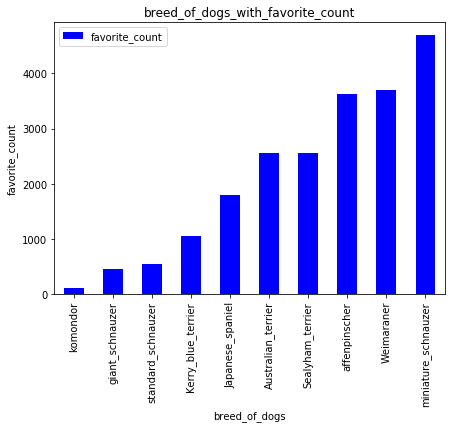

In [461]:
#plotting a bar graph showing the favorite_count by dog breed 
dogs_favorite_count = twitter_archive_master.groupby('p2').sum().favorite_count.sort_values()[:10]
dogs_favorite_count.plot(kind='bar',  color='b', figsize=(7,5))
plt.title('breed_of_dogs_with_favorite_count')
plt.ylabel('favorite_count')
plt.xlabel('breed_of_dogs')
plt.legend(); 

Visual 1 shows that the dog breed: Miniature_Schnauzer has the highest favourite_count in the scale of 10 with over 4000+ favourite_count.

#### Visual #2: Breed of Dog having the highest rating_denominator

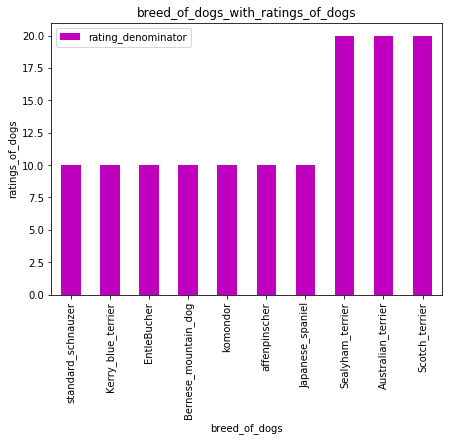

In [466]:
#plotting a bar graph showing the dog breed with the highest rating_denominator 
dogs_rating = twitter_archive_master.groupby('p2').sum().rating_denominator.sort_values()[:10]
dogs_rating.plot(kind='bar',  color='m', figsize=(7,5))
plt.title('breed_of_dogs_with_ratings_of_dogs')
plt.ylabel('ratings_of_dogs')
plt.xlabel('breed_of_dogs')
plt.legend(); 

Visual 2 shows that the dog breeds: Sealyham_terrier, Australian_terrier and Scotch_terrier have the highest rating_denominator in the scale of 10 breeds.

#### Visual #3: Breed of Dog having the lowest retweet_count.

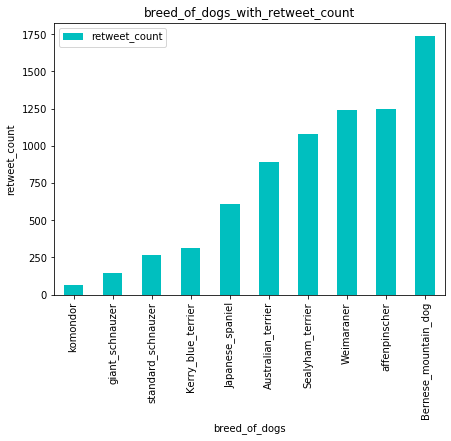

In [464]:
#plotting a bar graph showing the dog breed with the lowest retweet_count 
dogs_retweet_count = twitter_archive_master.groupby('p2').sum().retweet_count.sort_values()[:10]
dogs_retweet_count.plot(kind='bar',  color='c', figsize=(7,5))
plt.title('breed_of_dogs_with_retweet_count')
plt.ylabel('retweet_count')
plt.xlabel('breed_of_dogs')
plt.legend(); 

Visual 3 shows that the dog breed: Komondor has the lowest retweet_count in the scale of 10 breeds with a count less than 250

### Reference

**I also acknowledge visiting the following sites for assistance on my coding.**

- https://stackoverflow.com/questions/49224355/how-to-merge-3-dataset-in-pandas  
- https://www.codegrepper.com/code-examples/python/from+string+to+time+python+datafram 
- https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/